In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc

# Cargar el dataset
data = load_breast_cancer()
X = data.data
y = data.target



In [2]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)




In [3]:

# Resultados
print("----- MÉTRICAS DE CLASIFICACIÓN -----")
print(f"Precisión: {precision:.2f}")
print(f"Exactitud: {accuracy:.2f}")
print(f"Sensibilidad (Recall): {recall:.2f}")
print(f"Especificidad: {specificity:.2f}")
print(f"AUC: {roc_auc:.2f}")
print("Matriz de Confusión:")
print(conf_matrix)



----- MÉTRICAS DE CLASIFICACIÓN -----
Precisión: 0.95
Exactitud: 0.96
Sensibilidad (Recall): 0.99
Especificidad: 0.91
AUC: 1.00
Matriz de Confusión:
[[39  4]
 [ 1 70]]


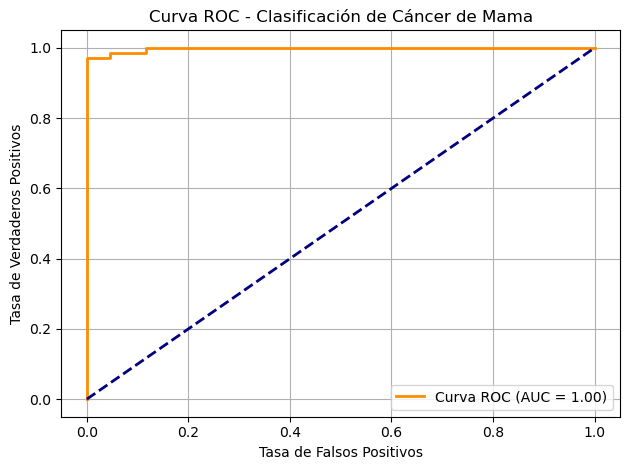

In [4]:

# Curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Clasificación de Cáncer de Mama')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

